<a href="https://colab.research.google.com/github/Tic-tacDixlofos/Sigmoid/blob/main/Alina_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ideas

- The first step I will take when analyzing this dataset is to determine the key factors that will guide my assumptions about potential dependencies.

- I will carefully evaluate which variables are most relevant and meaningful for identifying relationships within the data. Additionally, I will explore the correlations between different data points to uncover patterns or trends that might inform my analysis.


- Finally, I will define a clear and structured format for my work, ensuring that the methodology and approach are both systematic and adaptable to the dataset's complexities.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [12]:
# Load and show dataset
dt = pd.read_csv('Housing.csv')
dt

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

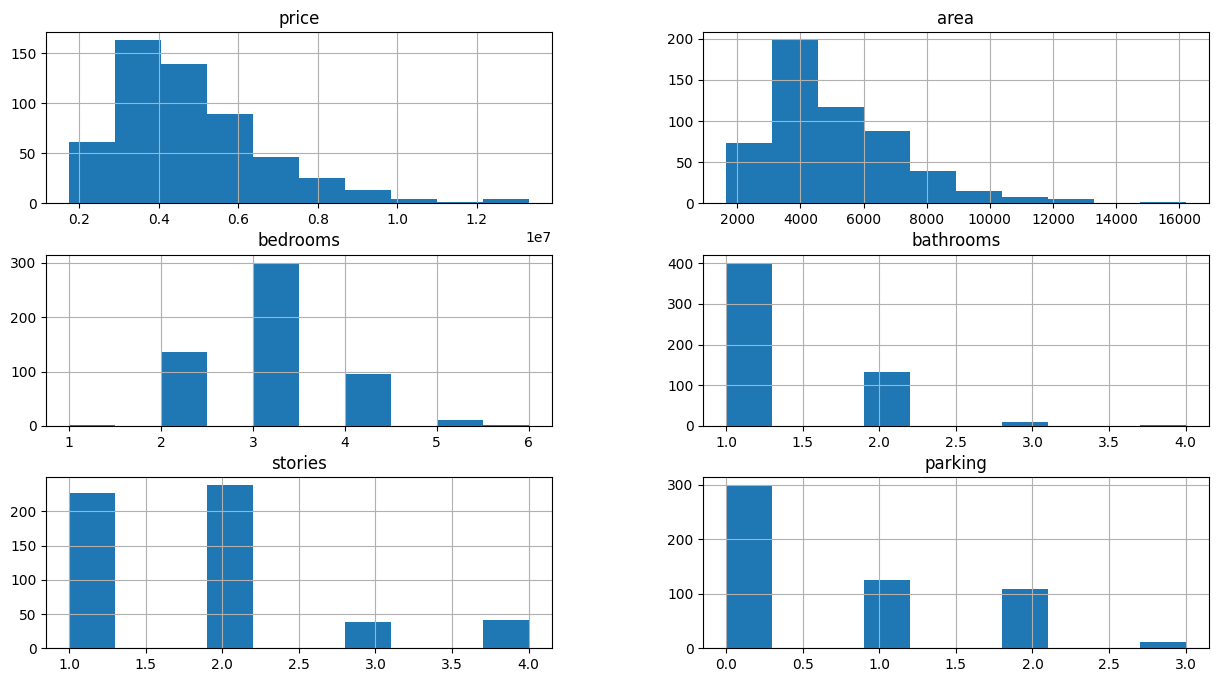

In [18]:
dt.hist(figsize=(15, 8)) # hsistogram fro data from the table

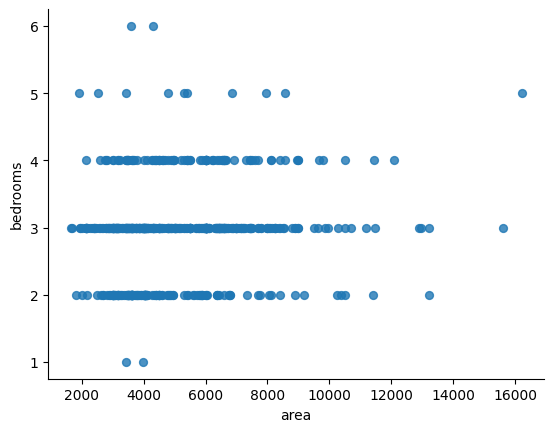

In [32]:
from matplotlib import pyplot as plt
dt.plot(kind='scatter', x='area', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False) #also explanation about the data this is how the amount of rooms and metric correlates

In [14]:
# Data from the table shoul be transformed into the metrics which would be understandable for the computer/ im taking
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_dt = encoder.fit_transform(dt[categorical_features])

In [15]:
#  convert coded categorical data into a DataFrame and assign meaningful column names to it.
encoded_categorical_df = pd.DataFrame(encoded_categorical_dt, columns=encoder.get_feature_names_out(categorical_features))

In [27]:
# these lines of code remove the original categorical features from the DataFrame and replace them with their encoded versions
data = dt.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_categorical_df], axis=1)

# Define the features the input data from the output data/ prediction that the model is supposed to predict.
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets size of test will be 20 percent of an all amount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# to be sure thta columns are matching to work with them
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# handle infinite values and replace them with nan
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with NaN values cause compilator cant read nan
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# optionally, fill NaN values with the mean of the column,
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# scaling the data, te data to enter in standart values 0 to 1
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)



<Axes: >

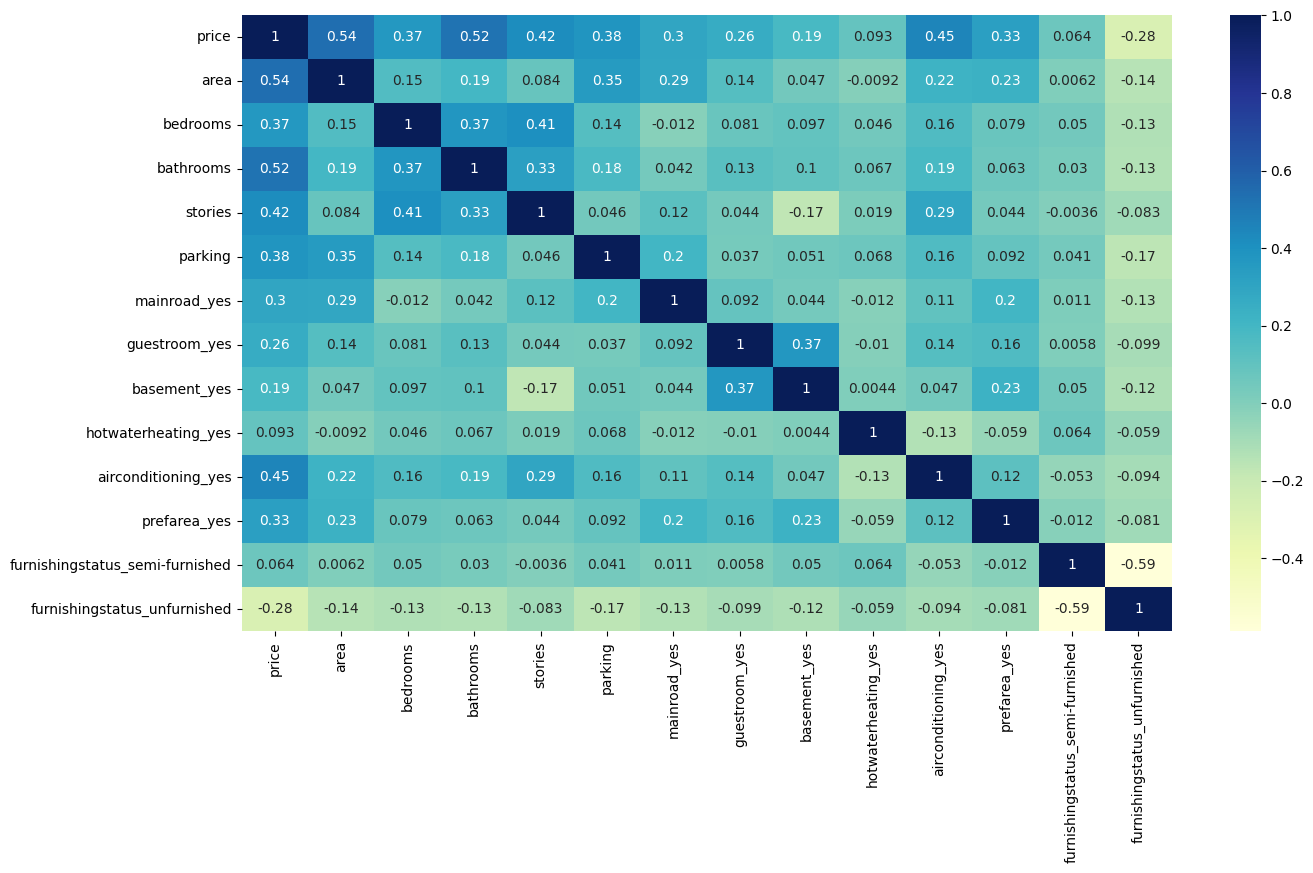

In [31]:
#using heatmap to show dependencies of ecach factor, how it correlates with other factors. I want to point th existance of negative correlation, it means thta it doesnt values
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## Assumptions

- My work plan begins with thoroughly familiarizing myself with the
dataset to understand its structure, content, and nuances.
The next step will involve transforming the dataset into a readable matrix format that can be easily interpreted and processed by the compiler. This transformation ensures that the data is structured appropriately for further analysis.
- Following this, I will focus on visualizing the dependencies within the data using graphs.
- Special attention will be given to highlighting the relationship between the area and the number of rooms, as this dependency is a key aspect of the analysis.

Mean Squared Error: 1754318687330.6677
R^2 Score: 0.6529242642153177


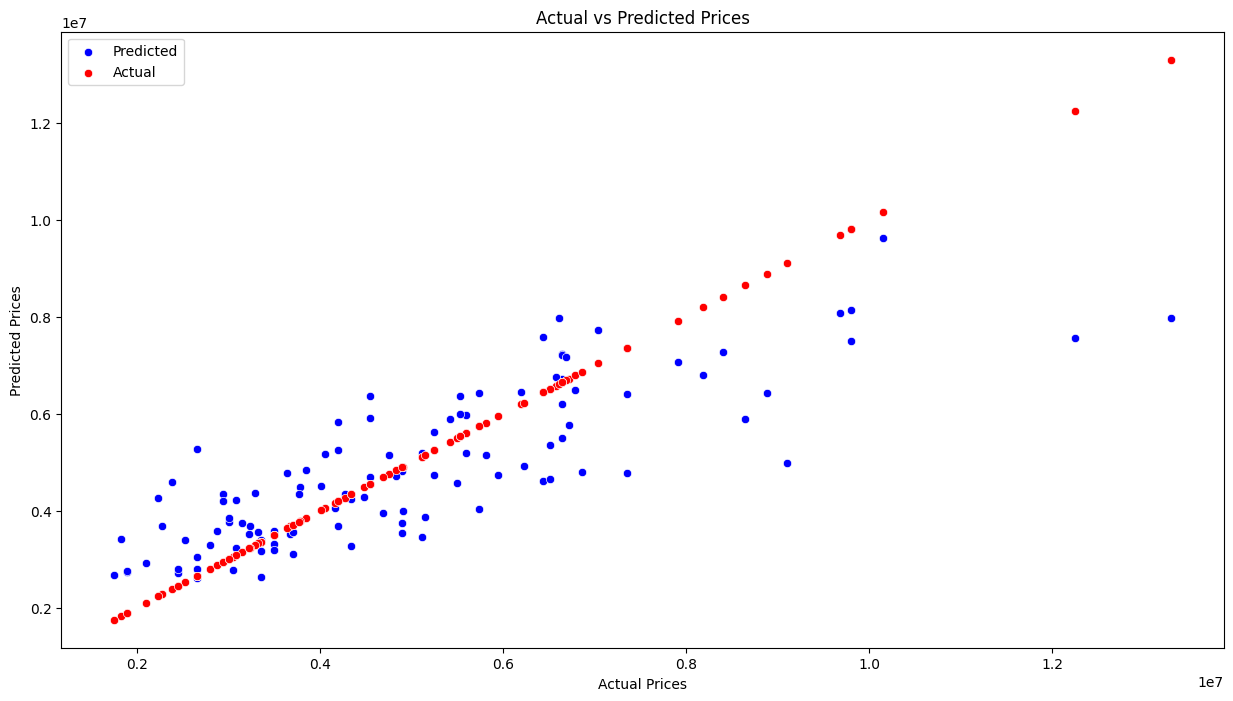

In [30]:
# linear regression model
model = LinearRegression()


model.fit(X_train_s, y_train) # Train the model using the training data

y_pred = model.predict(X_test_s) # Make predictions using the testing data

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')
sns.scatterplot(x=y_test, y=y_test, color='red', label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# conclusions
- By using the steps described on the page, i noticed how my own prediction on a Linear Regression model was succesfull predicted the result of price growth.
- A dependency map has been instrumental in illustrating how various factors are interconnected within this code. It provides a clear visualization of the relationships and dependencies among variables. To further analyze these dependencies and predict future outcomes, I used a linear regression model. This model effectively calculates the relationships between factors and provides reliable predictions based on the data.
- Alternatively, the RandomForest model could be a viable option for such tasks, offering robust predictive capabilities. However, in my view, the simplicity and efficiency of the linear regression model make it a more practical choice for this analysis.